In [1]:
pip install -U scikit-learn


  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1


In [2]:
!pip install pmdarima

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

# Reading Dataset

In [5]:
gold=pd.read_csv("E:\Sushant\Datascience\Project 175\Gold_data.csv")

gold
plt.rcParams['figure.figsize']=(20,5)

In [6]:
gold.shape

(2182, 2)

In [7]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [8]:
gold.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


<AxesSubplot:>

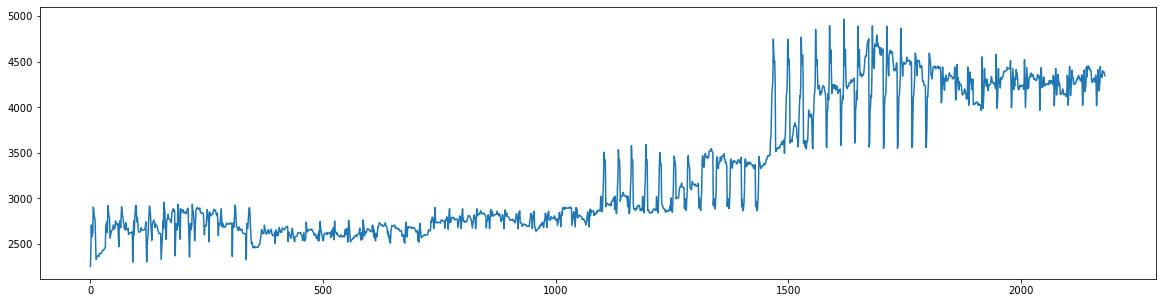

In [9]:
gold['price'].plot()

c:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

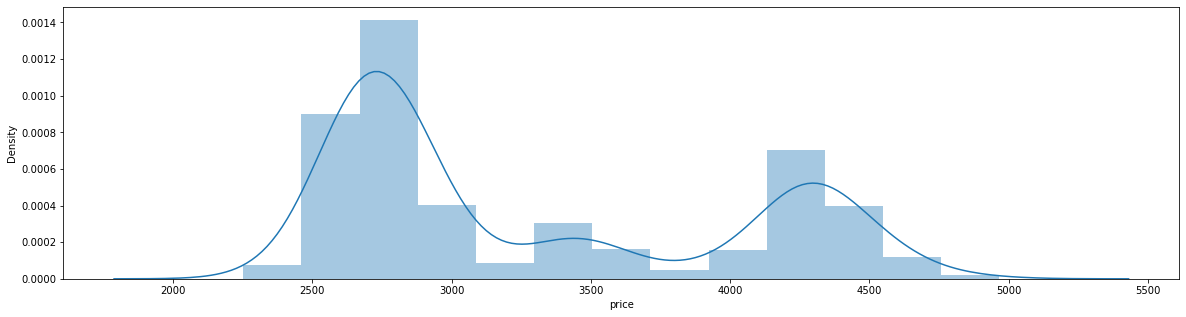

In [10]:
# distplot
sns.distplot(gold['price'])

<AxesSubplot:>

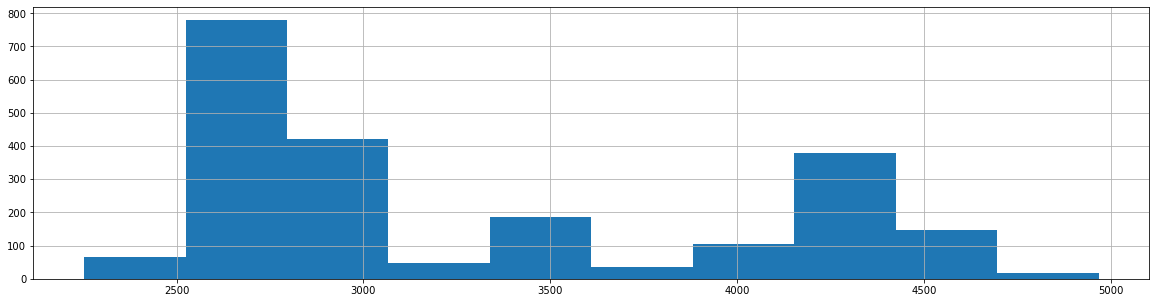

In [11]:
# histogram
gold['price'].hist()

In [12]:
gold['date']=pd.to_datetime(gold['date'])

In [13]:
gold1=gold.copy()
#sepaating date column into year, month and day
gold1['year'] = gold1['date'].dt.year
gold1['month'] =gold1['date'].dt.month
gold1['day'] = gold1['date'].dt.day
gold1

,date,price,year,month,day
0,2016-01-01,2252.60,2016,1,1
1,2016-01-02,2454.50,2016,1,2
2,2016-01-03,2708.10,2016,1,3
3,2016-01-04,2577.80,2016,1,4
4,2016-01-05,2597.75,2016,1,5
...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,17
2178,2021-12-18,4389.50,2021,12,18
2179,2021-12-19,4389.50,2021,12,19
2180,2021-12-20,4354.10,2021,12,20


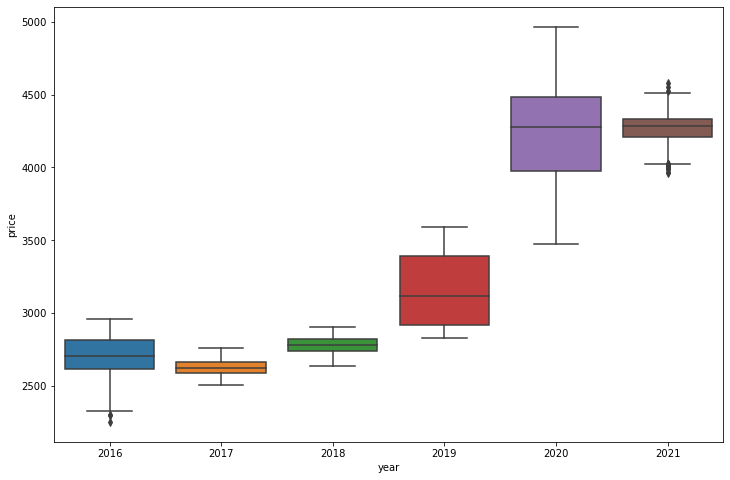

In [14]:
# boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x = 'year', y ='price',data = gold1)
plt.show()

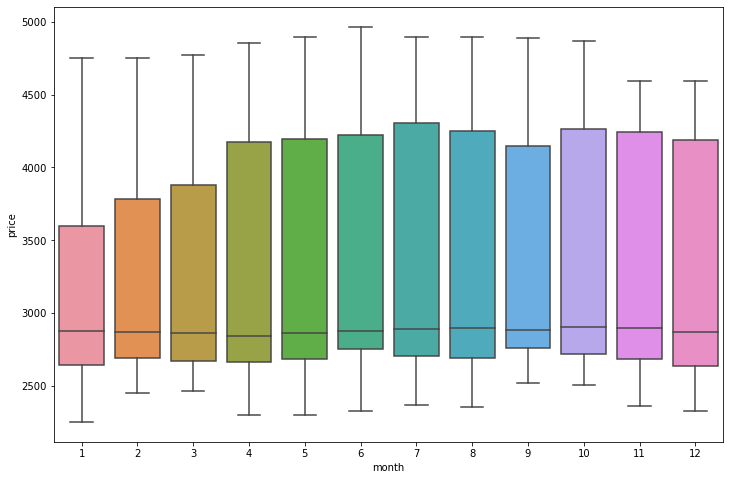

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'price',data = gold1)
plt.show()

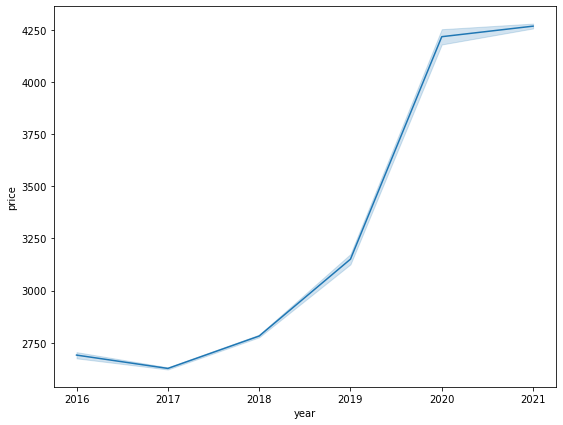

In [16]:
# Lineplot
plt.figure(figsize=(9,7))
sns.lineplot(x = 'year', y = 'price',data = gold1)
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

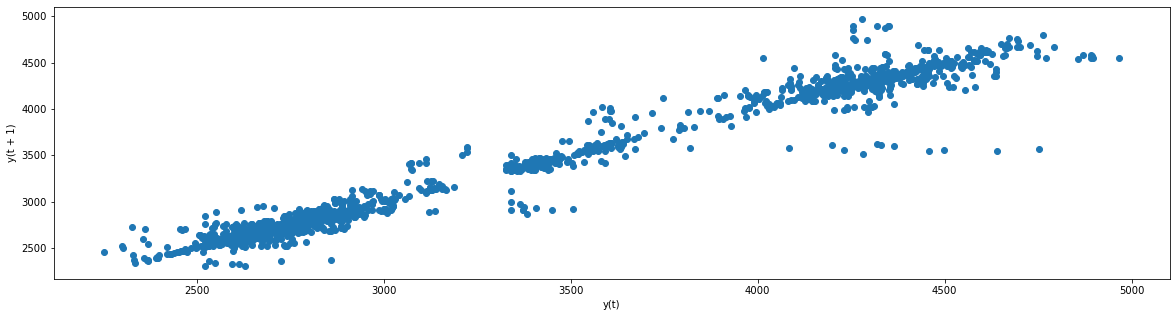

In [17]:
# Lagplot
from pandas.plotting import lag_plot
lag_plot(gold['price'])

In [18]:
gold['t']= np.arange(0,2182) 
gold.sample(10)

,date,price,t
718,2017-12-19,2591.5,718
1712,2020-09-08,4890.5,1712
1352,2019-09-14,3395.0,1352
2003,2021-06-26,4242.3,2003
629,2017-09-21,2692.2,629
2030,2021-07-23,4304.1,2030
525,2017-06-09,2751.1,525
865,2018-05-15,2828.5,865
489,2017-05-04,2600.8,489
1416,2019-11-17,3376.3,1416


# Moving Average

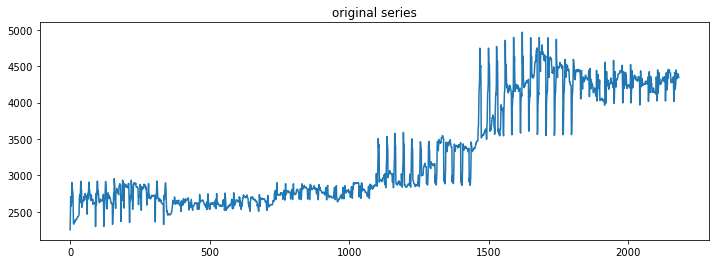

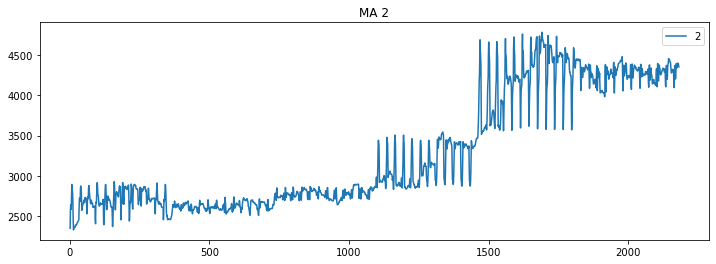

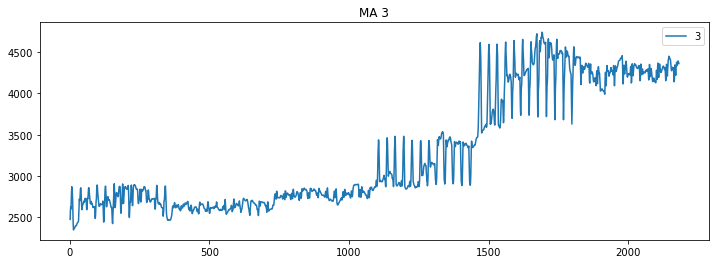

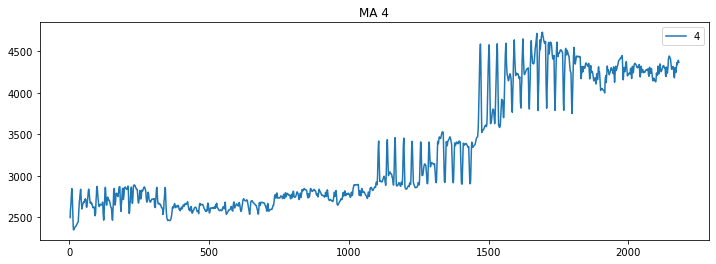

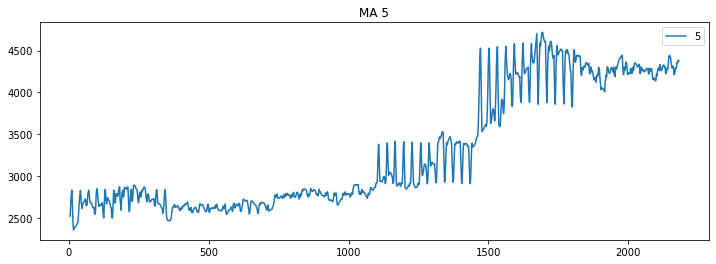

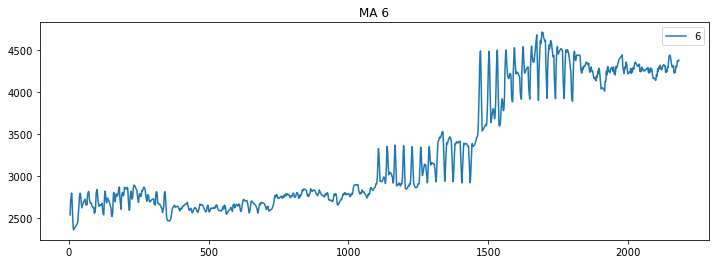

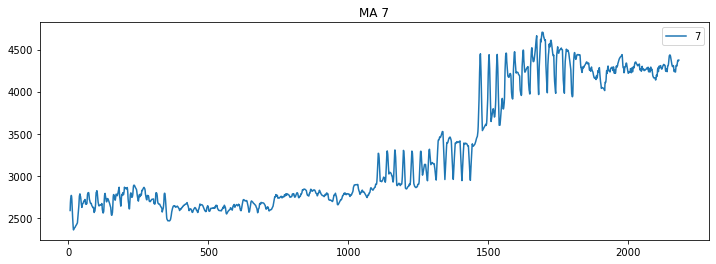

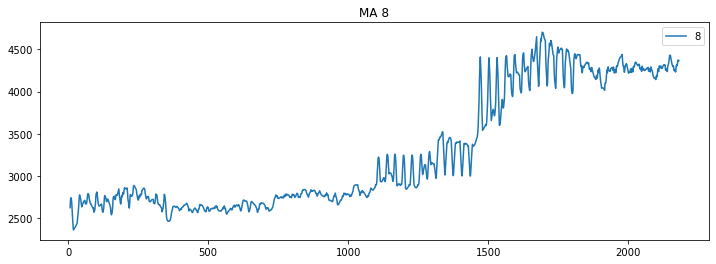

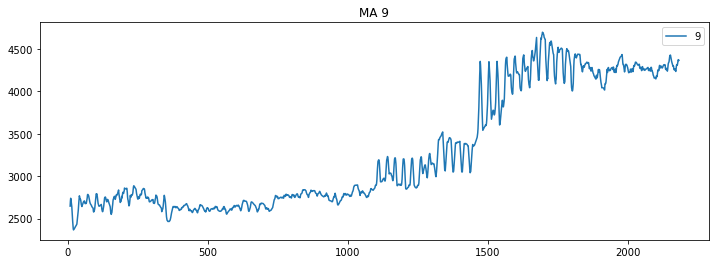

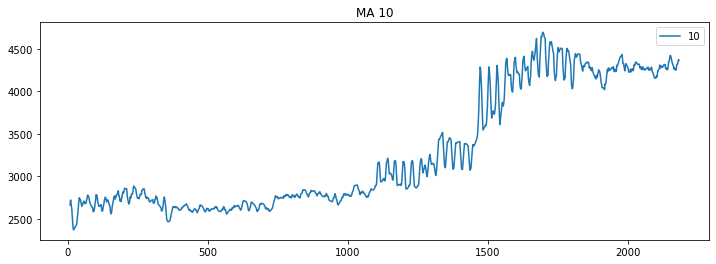

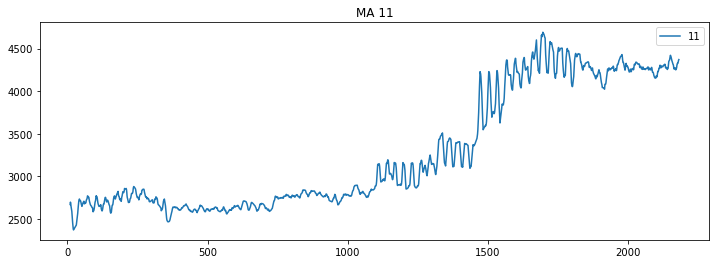

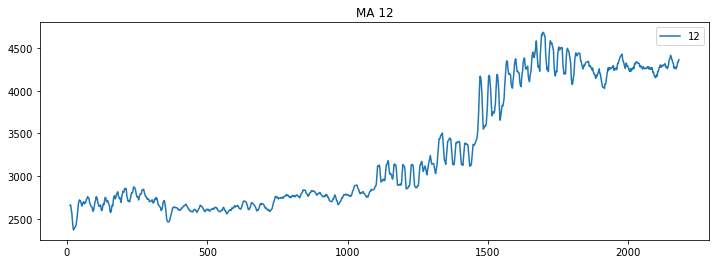

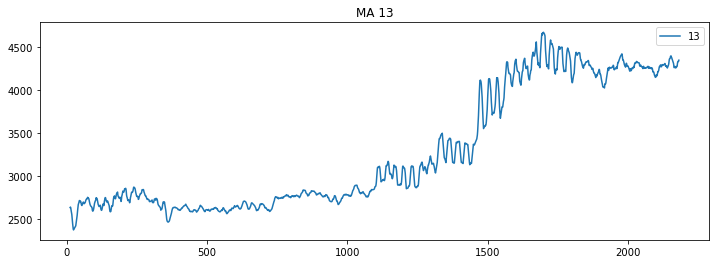

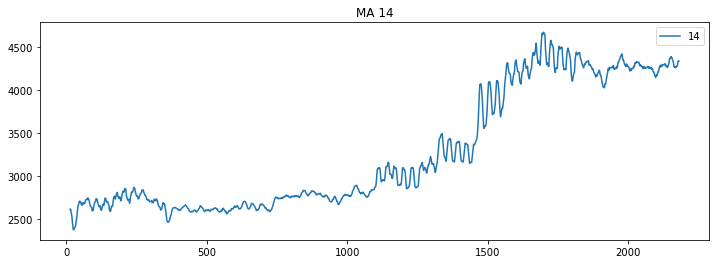

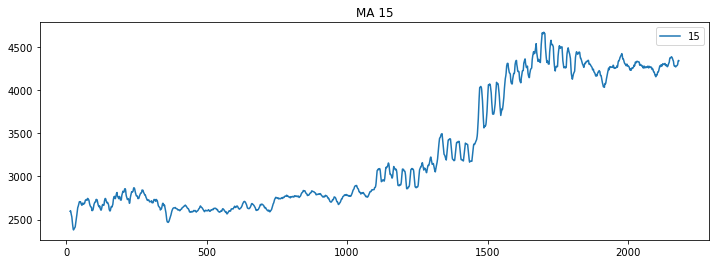

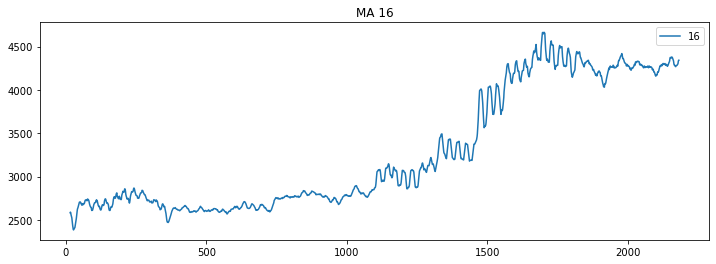

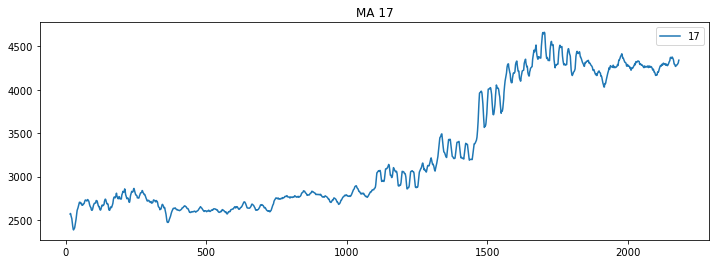

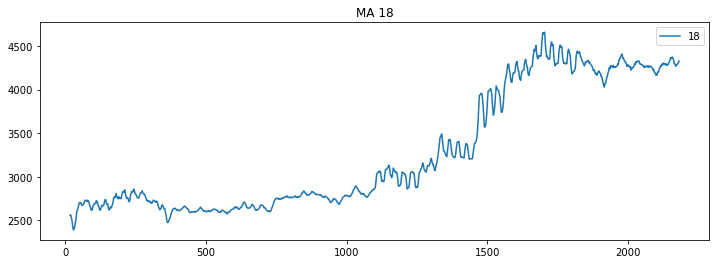

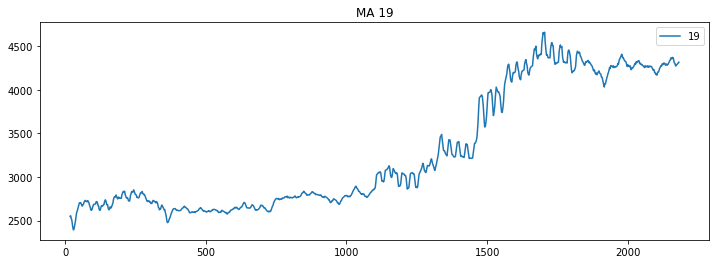

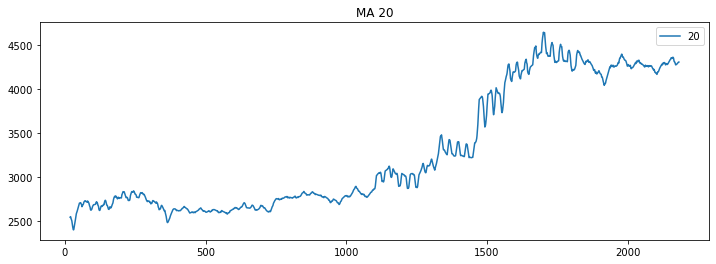

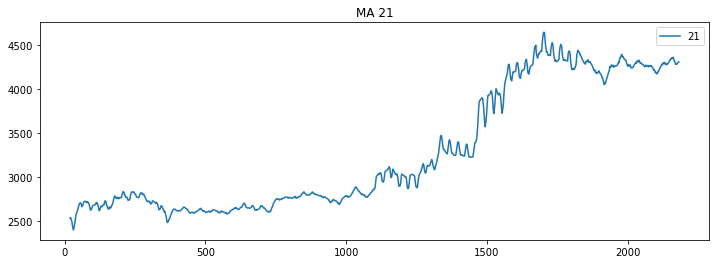

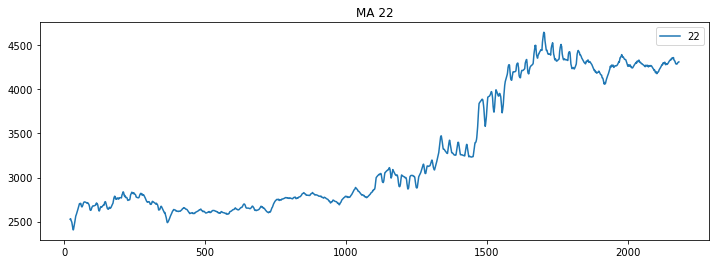

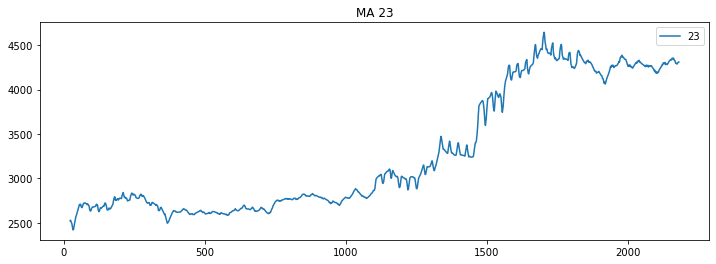

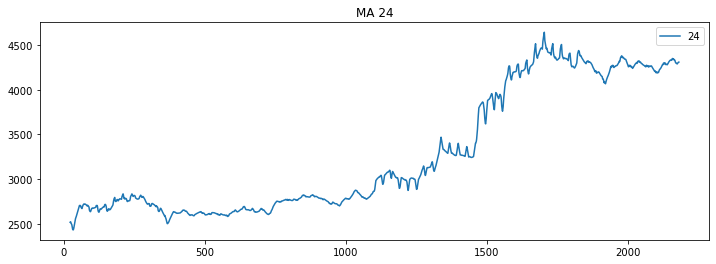

In [19]:
#Smoothening of the graph
plt.figure(figsize=(12,4))
gold.price.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    gold["price"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time Series Decomposition Plot

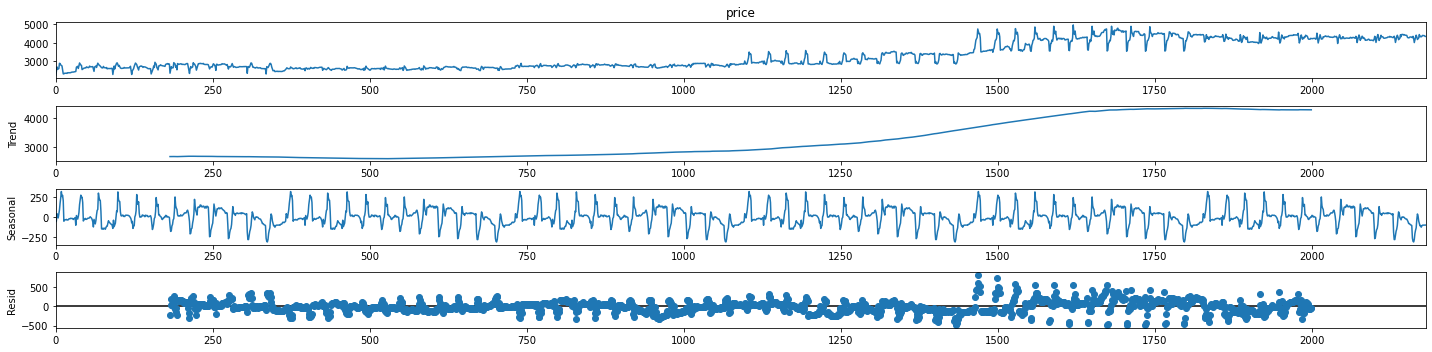

In [20]:
decompose_gold1= seasonal_decompose(gold1.price,period=365,model='additive')
decompose_gold1.plot()
plt.show() 

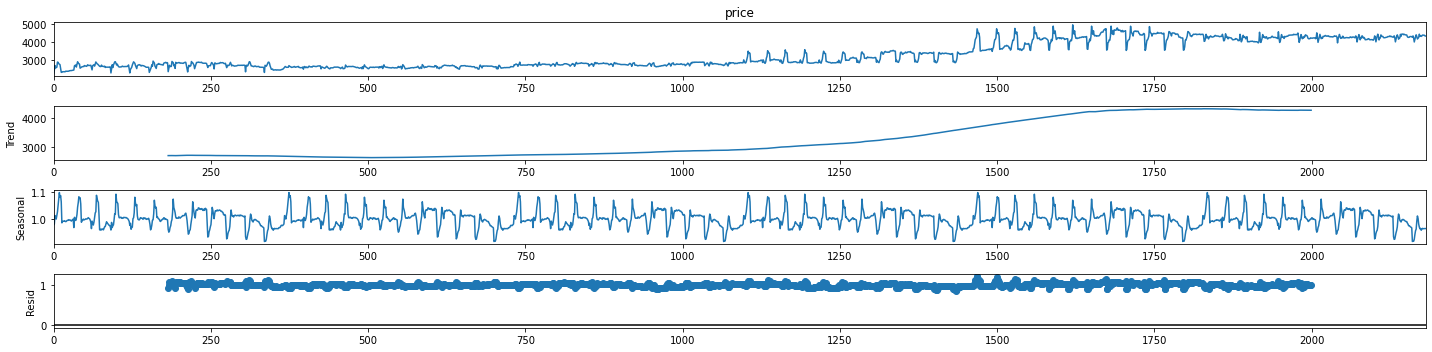

In [21]:
decompose_gold2= seasonal_decompose(gold1.price,period=365,model='multiplicative')
decompose_gold2.plot()
plt.show() 

In [22]:
!pip install literal

    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\acer\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\acer\\AppData\\Local\\Temp\\pip-install-n4dh7rwy\\literal_06eb8cbda6a34934a95e01486b6708e3\\setup.py'"'"'; __file__='"'"'C:\\Users\\acer\\AppData\\Local\\Temp\\pip-install-n4dh7rwy\\literal_06eb8cbda6a34934a95e01486b6708e3\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\acer\AppData\Local\Temp\pip-pip-egg-info-4gha1tkd'
         cwd: C:\Users\acer\AppData\Local\Temp\pip-install-n4dh7rwy\literal_06eb8cbda6a34934a95e01486b6708e3\
    Complete output (1 lines):
    error in literal setup command: use_2to3 is invalid.
    ----------------------------------------
E

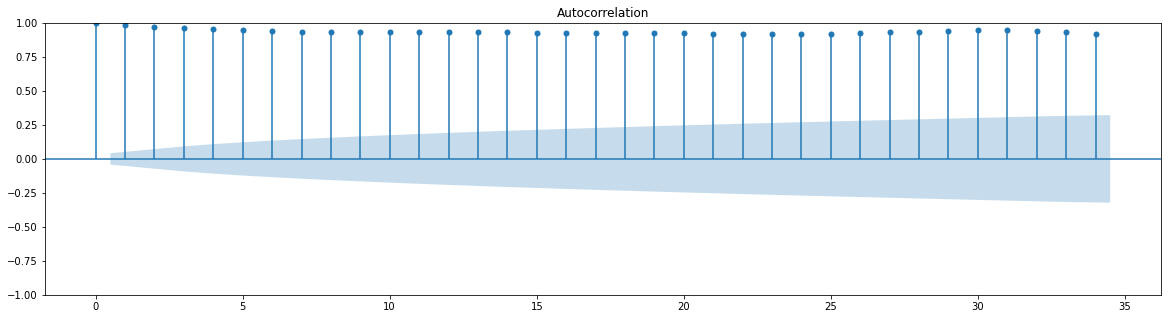

In [23]:
#ACF Plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(gold['price']) 

c:\Users\acer\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


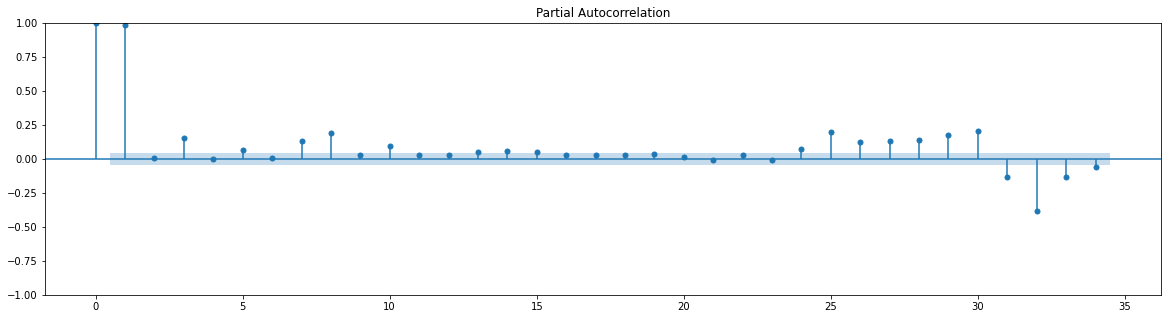

In [24]:
#PACF plot
pacf=plot_pacf(gold.price)

In [25]:
#Splitting the data
Train=gold.head(1525)
Test=gold.tail(657)

In [26]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

# Data Based models

In [27]:
# Holt method 
hw_model = Holt(Train["price"]).fit(smoothing_level=0.2, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
mape_hw=MAPE(pred_hw,Test.price) 
mape_hw

C:\Users\acer\AppData\Local\Temp\ipykernel_2216\3105553119.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["price"]).fit(smoothing_level=0.2, smoothing_slope=0.2)


0.5952929968303549

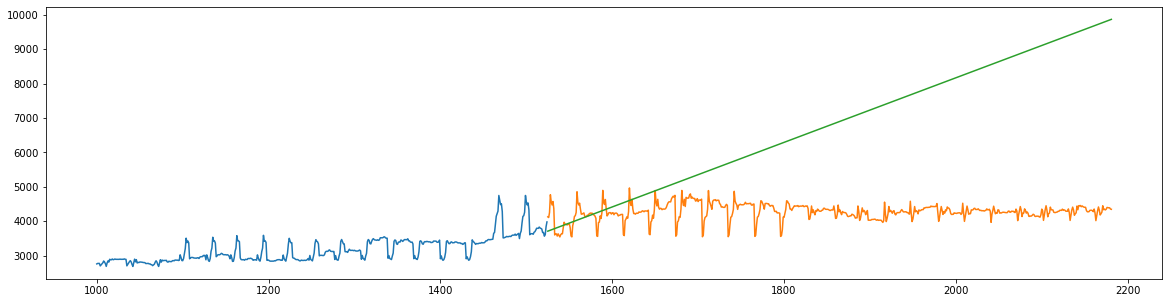

In [28]:
forecasted_hw = pd.Series(pred_hw)
plt.plot(Train['price'][1000:])
plt.plot(Test['price'])
plt.plot(forecasted_hw)

In [29]:
# Holt method with additive seasonality and additive trend.
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=183).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_add_add=MAPE(pred_hwe_add_add,Test.price) 
mape_hwe_add_add

0.4063608616947008

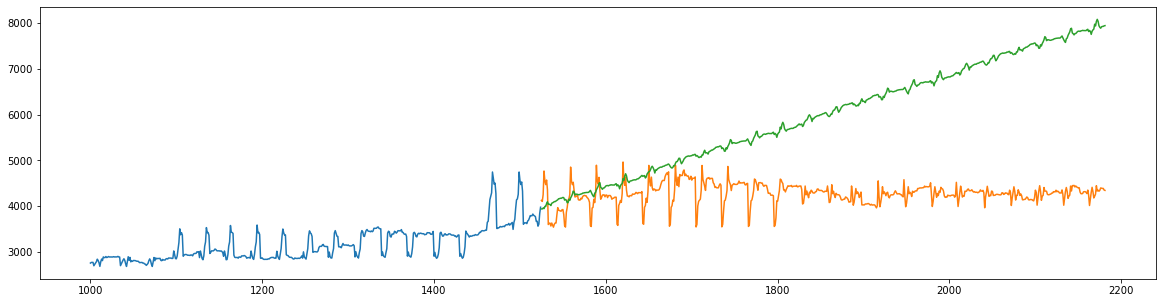

In [30]:
forecasted_hweaddadd = pd.Series(pred_hwe_add_add)
plt.plot(Train['price'][1000:])
plt.plot(Test['price'])
plt.plot(forecasted_hweaddadd)

In [31]:
# Holt method with multiplicative seasonality and additive trend.
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=183).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_add=MAPE(pred_hwe_mul_add,Test.price)
mape_hwe_mul_add

0.05185510072393261

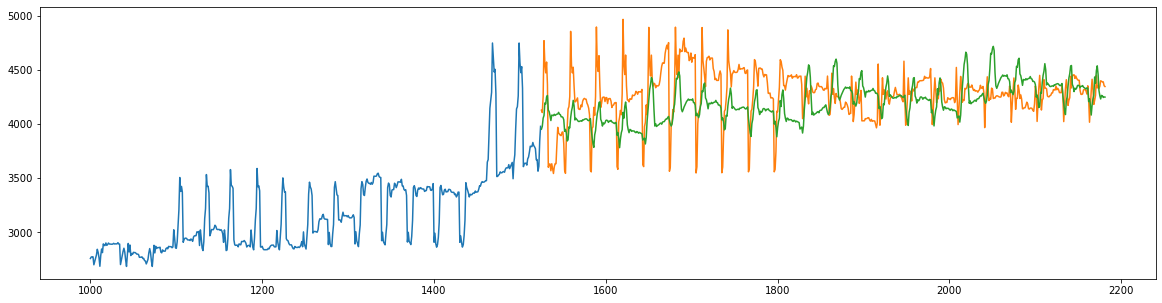

In [32]:
forecasted_hwemuladd = pd.Series(pred_hwe_mul_add)
plt.plot(Train['price'][1000:])
plt.plot(Test['price'])
plt.plot(forecasted_hwemuladd)

In [33]:
# Holt method with multiplicative seasonality and additive trend.
hwe_model_mul_mul = ExponentialSmoothing(Train["price"],seasonal="mul",trend="mul",seasonal_periods=183).fit() 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_mul=MAPE(pred_hwe_mul_mul,Test.price)
mape_hwe_mul_mul

c:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


0.500168340578318

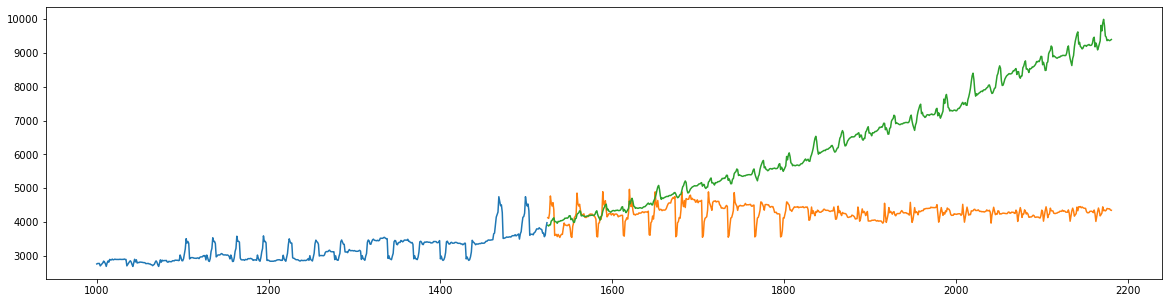

In [34]:
forecasted_hwemulmul = pd.Series(pred_hwe_mul_mul)
plt.plot(Train['price'][1000:])
plt.plot(Test['price'])
plt.plot(forecasted_hwemulmul)

# Model Based 

In [35]:
#Grid Search CV
from pmdarima import auto_arima
arima = auto_arima(gold['price'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26623.835, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26849.714, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26851.587, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26851.536, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26847.869, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26631.605, Time=1.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26635.529, Time=1.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26625.835, Time=3.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26625.835, Time=3.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26662.140, Time=0.98 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26629.134, Time=2.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26633.886, Time=1.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26613.890, Time=3.05 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26592.637, Time=4.02 sec
 ARIMA(4,1,2)(0,0,0

In [36]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2182
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13266.393
Date:                Mon, 16 Jan 2023   AIC                          26556.786
Time:                        08:58:21   BIC                          26625.036
Sample:                             0   HQIC                         26581.736
                               - 2182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4340      0.522      0.831      0.406      -0.590       1.458
ar.L1         -0.4935      0.018    -26.954      0.000      -0.529      -0.458
ar.L2         -0.5283      0.022    -24.517      0.000      -0.570      -0.486
ar.L3         -0.0297      0.027     -1.113      0.266      -0.082       0.023
ar.L4          0.0582      0.021      2.825      0.005       0.018       0.099
ar.L5          0.7808      0.016     48.930      0.000       0.749       0.812
ma.L1          0.3504      0.014     25.147      0.000       0.323       0.378
ma.L2          0.2713      0.015     18.262      0.000       0.242       0.300
ma.L3         -0.2327      0.015    -15.380      0.000      -0.262      -0.203
ma.L4         -0.3013      0.013    -22.472      0.000      -0.328      -0.275
ma.L5         -0.9246      0.011    -81.245      0.000      -0.947      -0.902
sigma2       1.19e+04    179.155     66.413      0.000    1.15e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   9.09   Jarque-Bera (JB):             35676.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.45   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# fit model
train = gold.iloc[:len(gold)-30]
test = gold.iloc[len(gold)-30:]

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['price'],order =(5,1,5))
result = model.fit()

c:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
#Predictions
start = len(train)
end =len(train)+len(test)-1
pred_arima= result.predict(start= start, end= end)
mape_arima=MAPE(pred_arima,test.price)
mape_arima

0.017270706110162622

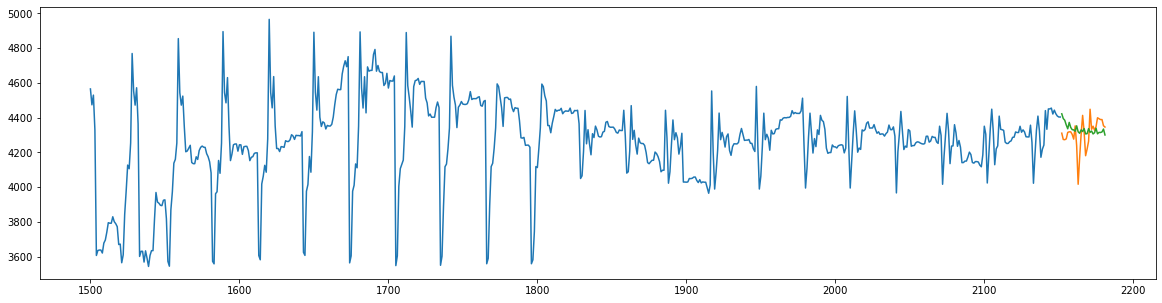

In [39]:
forecasted_arima = pd.Series(pred_arima)
plt.plot(train['price'][1500:])
plt.plot(test['price'])
plt.plot(forecasted_arima)

In [40]:
train.head(3)

,date,price,t
0,2016-01-01,2252.6,0
1,2016-01-02,2454.5,1
2,2016-01-03,2708.1,2


In [41]:
train['price'].head(5)

0    2252.60
1    2454.50
2    2708.10
3    2577.80
4    2597.75
Name: price, dtype: float64

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train['price'],order =(5,1,5),seasonal_order=(5, 1, 5,12)) 
model = sarima.fit()

c:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
#Predictions
start = len(train)
end =len(train)+len(test)-1
pred_sarima= model.predict(start= start, end= end)
mape_sarima=MAPE(pred_sarima,test.price)
mape_sarima

0.018115076375940776

In [44]:
import pickle

In [45]:
with open('sarima_model.pkl', 'wb') as file:
    pickle.dump(model, file)

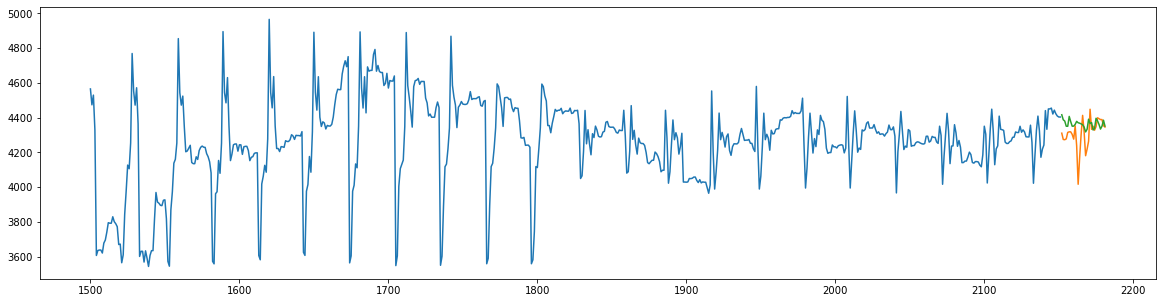

In [46]:
forecasted_sarima = pd.Series(pred_sarima)
plt.plot(train['price'][1500:])
plt.plot(test['price'])
plt.plot(forecasted_sarima)

In [47]:
from statsmodels.tools.eval_measures import rmse
hw_rmse=rmse(Test["price"], pred_hw)
hwe_add_add_rmse=rmse(Test["price"], pred_hwe_add_add)
hwe_mul_add_rmse=rmse(Test["price"], pred_hwe_mul_add)
hwe_mul_mul_rmse=rmse(Test["price"], pred_hwe_mul_mul)
arima_rmse=rmse(test["price"], pred_arima)
sarima_rmse=rmse(test["price"], pred_sarima)

In [48]:
# Creating DataFrame for all MAE values
data = {"MODEL":pd.Series(["mape_hw","mape_hwe_add_add","mape_hwe_mul_add","mape_hwe_mul_mul","mape_arima","mape_sarima"]),"mape_values":pd.Series([mape_hw,mape_hwe_add_add,mape_hwe_mul_add,mape_hwe_mul_mul,mape_arima,mape_sarima]),"rmse_values":pd.Series([hw_rmse,hwe_add_add_rmse,hwe_mul_add_rmse,hwe_mul_mul_rmse,arima_rmse,sarima_rmse])}
table=pd.DataFrame(data)
table.sort_values(['mape_values','rmse_values'])

,MODEL,mape_values,rmse_values
4,mape_arima,0.017271,93.980479
5,mape_sarima,0.018115,103.097490
2,mape_hwe_mul_add,0.051855,268.273730
1,mape_hwe_add_add,0.406361,2072.410576
3,mape_hwe_mul_mul,0.500168,2683.715832
0,mape_hw,0.595293,3072.912710


#  Model Evaluation

In [49]:
#Forecasting with Arima Model
# Forecast for the next 30 days
index_future_dates=pd.date_range(start='22-12-2021',end='21-1-2022')
forecast_arima = result.predict(start = len(gold), 
                          end = len(gold)+30, 
                          typ = 'levels')
forecast_arima.index=index_future_dates
forecast_arima

c:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '22-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


2021-12-22    4315.794956
2021-12-23    4324.798553
2021-12-24    4316.372026
2021-12-25    4326.983857
2021-12-26    4300.533277
2021-12-27    4320.424968
2021-12-28    4330.041461
2021-12-29    4309.631433
2021-12-30    4321.632761
2021-12-31    4306.564097
2022-01-01    4323.930709
2022-01-02    4328.982751
2022-01-03    4302.948795
2022-01-04    4321.691873
2022-01-05    4314.654282
2022-01-06    4322.533687
2022-01-07    4324.498680
2022-01-08    4300.724887
2022-01-09    4325.504074
2022-01-10    4319.996996
2022-01-11    4316.688118
2022-01-12    4321.189502
2022-01-13    4303.746912
2022-01-14    4328.870124
2022-01-15    4320.615576
2022-01-16    4310.048497
2022-01-17    4321.798613
2022-01-18    4309.225530
2022-01-19    4328.481807
2022-01-20    4318.208441
2022-01-21    4306.365690
Freq: D, Name: predicted_mean, dtype: float64

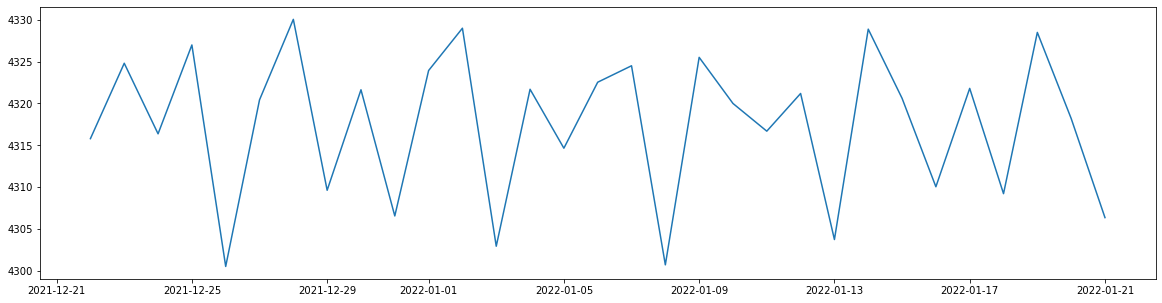

In [50]:
plt.plot(forecast_arima)

In [51]:
#Forecasting with Sarima Model
# Forecast for the next 30 days
index_future_dates=pd.date_range(start='22-12-2021',end='21-1-2022')
forecast_sarima = model.predict(start = len(gold), 
                          end = len(gold)+30, 
                          typ = 'levels')
forecast_sarima.index=index_future_dates
forecast_sarima

c:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '22-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


2021-12-22    4377.415952
2021-12-23    4369.696766
2021-12-24    4380.875667
2021-12-25    4372.210223
2021-12-26    4344.640427
2021-12-27    4391.536440
2021-12-28    4396.490474
2021-12-29    4362.470621
2021-12-30    4350.271029
2021-12-31    4351.969307
2022-01-01    4390.423071
2022-01-02    4366.061346
2022-01-03    4356.020930
2022-01-04    4373.104398
2022-01-05    4399.851799
2022-01-06    4401.827962
2022-01-07    4363.426336
2022-01-08    4362.603632
2022-01-09    4394.493163
2022-01-10    4413.432243
2022-01-11    4386.159095
2022-01-12    4389.357289
2022-01-13    4379.092783
2022-01-14    4406.347522
2022-01-15    4419.178544
2022-01-16    4403.172109
2022-01-17    4405.300008
2022-01-18    4385.324583
2022-01-19    4409.759762
2022-01-20    4411.419018
2022-01-21    4399.690706
Freq: D, Name: predicted_mean, dtype: float64

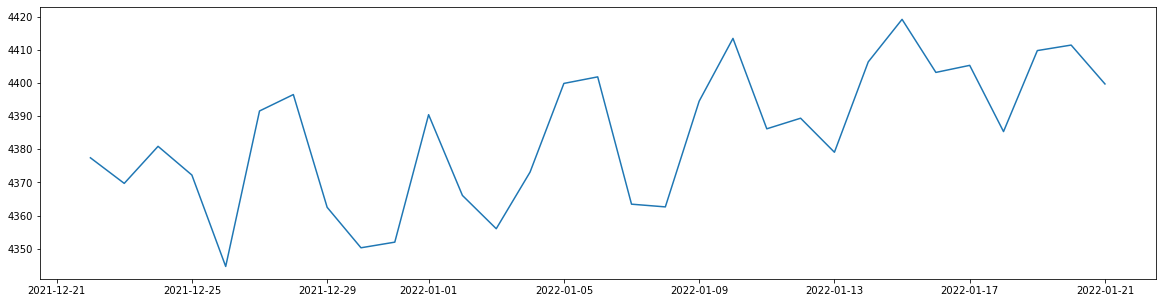

In [52]:
plt.plot(forecast_sarima)

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                 2152
Model:             SARIMAX(5, 1, 5)x(5, 1, 5, 12)   Log Likelihood              -13190.180
Date:                            Mon, 16 Jan 2023   AIC                          26422.361
Time:                                    09:07:11   BIC                          26541.391
Sample:                                         0   HQIC                         26465.918
                                           - 2152                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4800      0.044    -10.799      0.000      -0.567      -0.393
ar.L2         -0.5080      0.055     -9.287      0.000      -0.615      -0.401
ar.L3         -0.0029      0.068     -0.043      0.966      -0.135       0.130
ar.L4          0.0760      0.053      1.442      0.149      -0.027       0.179
ar.L5          0.7907      0.044     17.892      0.000       0.704       0.877
ma.L1          0.3689      0.038      9.775      0.000       0.295       0.443
ma.L2          0.2944      0.039      7.508      0.000       0.218       0.371
ma.L3         -0.2084      0.044     -4.695      0.000      -0.295      -0.121
ma.L4         -0.2846      0.036     -7.872      0.000      -0.355      -0.214
ma.L5         -0.9050      0.030    -29.808      0.000      -0.965      -0.846
ar.S.L12       0.0980      0.399      0.246      0.806      -0.684       0.880
ar.S.L24      -0.3019      0.312     -0.968      0.333      -0.913       0.309
ar.S.L36       0.1822      0.333      0.547      0.584      -0.471       0.835
ar.S.L48      -0.4463      0.265     -1.682      0.093      -0.966       0.074
ar.S.L60       0.1038      0.069      1.499      0.134      -0.032       0.240
ma.S.L12      -1.0691      0.399     -2.678      0.007      -1.852      -0.287
ma.S.L24       0.3020      0.412      0.733      0.464      -0.506       1.110
ma.S.L36      -0.4144      0.412     -1.007      0.314      -1.221       0.392
ma.S.L48       0.6059      0.389      1.558      0.119      -0.156       1.368
ma.S.L60      -0.3793      0.240     -1.580      0.114      -0.850       0.091
sigma2      2.045e+04    614.723     33.273      0.000    1.92e+04    2.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):             32805.01
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               4.42   Skew:                            -1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""